In [1]:
import os
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False
import numpy as np 
from hsfs import StarkMatrix, h, c

In [2]:
nmin = 33
nmax = 37
S = 1
MJ = 0
mat = StarkMatrix(nmin, nmax, S, MJ)
print("number of basis states = %d"%mat.num_states)

number of basis states = 515


In [3]:
# specify the electric field
field = np.linspace(0, 1, 101) # V /cm
# diagonalise for each field
sm = mat.stark_map(field * 100)

diagonalise Hamiltonian: 100%|███████████████████████████████████████████████████████| 101/101 [00:02<00:00, 38.69it/s]


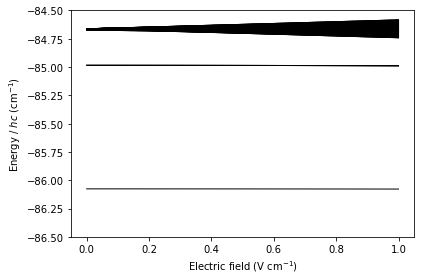

In [4]:
# Stark map
fig, ax = plt.subplots(figsize=(6, 4))

# select states
indxes = mat.where('n', 36)
for ix in indxes:
    ax.plot(field, 0.01*sm[:, ix] /(h * c), ls='-', lw=1, c='k')

# format
ax.set_ylim(-86.5, -84.5)
#ax.set_xlim(0, 5)
ax.set_xlabel('Electric field (V cm$^{-1}$)')
ax.set_ylabel('Energy / $h c$ (cm$^{-1}$)')
plt.tight_layout()
# output
plt.show()

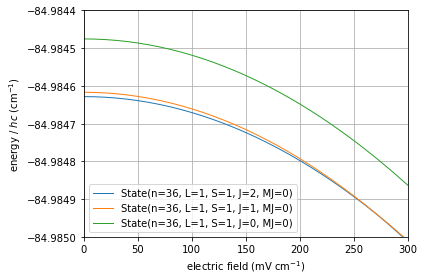

In [5]:
# Stark map
fig, ax = plt.subplots(figsize=(6, 4))

indxes = np.intersect1d(mat.where('n', 36), mat.where('L', 1))
for ix in indxes:
    ax.plot(1e3*field, 0.01*sm[:, ix] /(h * c), ls='-', lw=1, label=mat.basis[ix])

# format
ax.set_ylim(-84.985, -84.9844)
ax.set_xlim(0, 300)
ax.grid()
ax.legend()
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel('energy / $h c$ (cm$^{-1}$)')
plt.tight_layout()
# output
plt.show()

In [6]:
# get indexes of L=1 FS
ix_p0 = reduce(np.intersect1d, (mat.where('n', 36),
                                mat.where('L', 1),
                                mat.where('J', 0)))[0]

ix_p1 = reduce(np.intersect1d, (mat.where('n', 36),
                                mat.where('L', 1),
                                mat.where('J', 1)))[0]

ix_p2 = reduce(np.intersect1d, (mat.where('n', 36),
                                mat.where('L', 1),
                                mat.where('J', 2)))[0]

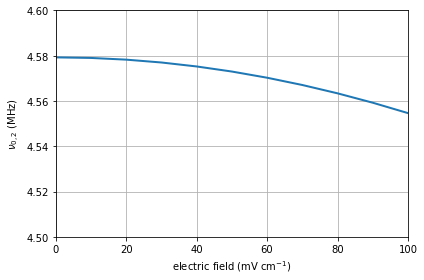

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

nu02 = sm[:, ix_p0] - sm[:, ix_p2]
ax.plot(1e3*field, 1e-6*nu02 / h, ls='-', lw=2)

# format
ax.set_xlim(0, 100)
ax.set_ylim(4.5, 4.6)
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel(r'$\nu_{0, 2}$ (MHz)')
plt.grid()
plt.tight_layout()
# output
plt.show()

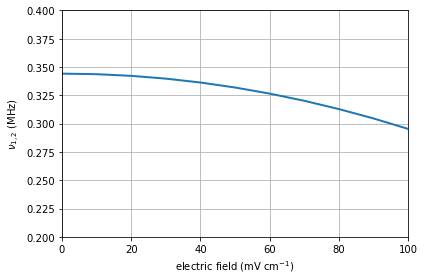

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

nu12 = sm[:, ix_p1] - sm[:, ix_p2]
ax.plot(1e3*field, 1e-6*nu12 /h, ls='-', lw=2)

# format
ax.set_xlim(0, 100)
ax.set_ylim(0.2, 0.4)
plt.grid()
ax.set_xlabel('electric field (mV cm$^{-1}$)')
ax.set_ylabel(r'$\nu_{1, 2}$ (MHz)')
plt.tight_layout()
# output
plt.show()